Laboratorio 4
Se tiene la siguiente ecuación:
$$
s =  \sum_{n=1}^{N} \frac{1}{n^{3}+3n+1}a^b
$$


La cual es una sumatoria en donde N∈N, a y b∈ R. Además, se sabe que N es un número que como máximo debe ser 4 294 967 29 y que tanto a como b no requieren mucha resolución.

Se le pide realizar un análisis comparativo entre funciones en Python y C. El programa en C debe incluir lo siguiente:

a) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.

In [17]:
%%file Sumatoria1.c
#include <math.h>

double CalcularSumatoria1(double a,double b, int N){
    int i;
    double s=0;
    for(i=1;i<=N;i++){
        s= (pow(a,b))/(pow((double)i,3)+3*i+1) + s;
    }

    return s;
}


Overwriting Sumatoria1.c


In [18]:
! gcc -shared -o sumatoria1.so Sumatoria1.c -lm

b) (1.0 punto) Una función que reciba como argumentos de entrada los valores de N, a y b, y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.

In [19]:
%%file Sumatoria2.c

#include <math.h>

double CalcularSumatoria2(double a,double b, int N){
    int i;
    double s=0;
    for(i=1;i<=N;i++){
        s= (pow(a,b))/(i*i*i+3*i+1) + s;
    }

    return s;
}



Overwriting Sumatoria2.c


In [20]:
! gcc -shared -o sumatoria2.so Sumatoria2.c -lm

Un programa principal en Python donde se debe incluir:

c) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.


In [21]:

def CalcularSumatoria1(a,b, N):
    s=0
    for i in range(1,N+1):
        s = (pow(a,b))/(pow(i,3)+3*i+1) + s

    return s



d) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.


In [22]:
def CalcularSumatoria2(a,b,N):
    s=0
    for i in range(1,N+1):
        s = (pow(a,b))/(i*i*i+3*i+1) + s

    return s

e) (2.0 punto) El llamado a la librería generada en C y los respectivos argumentos de entrada y de salida. Además, en comentarios, debe justificar los tipos de datos utilizados.



In [23]:
import ctypes
#importamos 2 librerías debio a que tenemos 2 funciones en C
lib = ctypes.CDLL("./sumatoria1.so")
lib.CalcularSumatoria1.argtypes = [ctypes.c_double,ctypes.c_double,ctypes.c_int] #se usan 2 valores double de entrada para los valores de a y b que pueden ser decimales y se usa un valor entero para N debido a que es un número natural
lib.CalcularSumatoria1.restype = ctypes.c_double #se usa un tipo de dato double de salida debido a que la sumatoria retorna un valor decimal.

lib2 = ctypes.CDLL("./sumatoria2.so")
lib2.CalcularSumatoria2.argtypes = [ctypes.c_double,ctypes.c_double,ctypes.c_int]
lib2.CalcularSumatoria2.restype = ctypes.c_double


f) (2.0 puntos) Validar que las 4 funciones dan los mismos resultados para los valores 1000, 3.5 y -0.25 para N,a y b, respectivamente.


In [24]:
print("Funcion 1 en python:",CalcularSumatoria1(3.5,-0.25,1000))
print("Funcion 2 en python:",CalcularSumatoria2(3.5,-0.25,1000))

print("Funcion 1 en c:",lib.CalcularSumatoria1(3.5,-0.25,1000))
print("Funcion 2 en c:",lib2.CalcularSumatoria2(3.5,-0.25,1000))




Funcion 1 en python: 0.24081597314253553
Funcion 2 en python: 0.24081597314253553
Funcion 1 en c: 0.24081597314253553
Funcion 2 en c: 0.24081597314253553


g) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando los datos del inciso f). Considerar graficar los tiempos para un valor de 50 iteraciones. Realizar comentarios acerca del resultado.


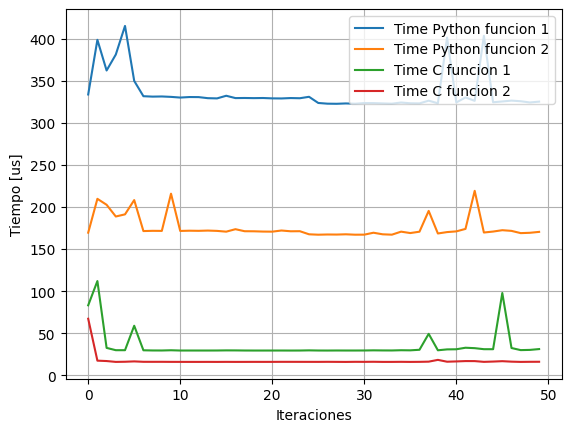

In [25]:
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt

iteraciones = 50
time_funcion1_python = []
time_funcion2_python = []
time_funcion1_c = []
time_funcion2_c = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,1000)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))

    #Tiempo sin pow para Python funcion2: toc2-tic2
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,1000)
    toc2 = time.perf_counter()
    time_funcion2_python.append(1e6*(toc2-tic2))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,1000)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    #Tiempo sin pow para C funcion2: toc4-tic4
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,1000)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))


plt.plot(time_funcion1_python)
plt.plot(time_funcion2_python)
plt.plot(time_funcion1_c)
plt.plot(time_funcion2_c)
plt.grid()
plt.legend(["Time Python funcion 1","Time Python funcion 2", "Time C funcion 1","Time C funcion 2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Comparacion de funciones en python y C para N = 1000.png")
plt.show()

#Luego de visualizar la grafica en donde se observa los tiempos de ejecucion para cada función, en primer lugar notamos que las funciones de C tienen un tiempo mucho
#menor comparado al de las funciones de Python. En segundo lugar, las funciones que no usan la función pow para el cálculo de n al cubo tienen un tiempo menor a las 
#funciones que lo usan, esto sucede tanto para las funciones en C como para las funciones en Python. Por último, la función que menos tarda en ejecutarse de las 4 es
#la función de C que no usa la función pow y la función que más tarda es la función de Python que usa pow.Podemos concluir que si necesitamos que nuestro programa en
#Python ejecute una función en un tiempo que sea bajo, la manera más eficiente de hacerlo es haciendo un llamado a una función en C mediante la librería ctypes.






h) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando N=1024,2048,4096,8192,1024x2,2048x2. Considerar 50 iteraciones para cada N. Graficar el resultado y brindar comentarios acerca del resultado.


### GRÁFICA DE TIEMPO DE EJECUCIÓN DE LAS FUNCIONES USANDO UN N=1024:

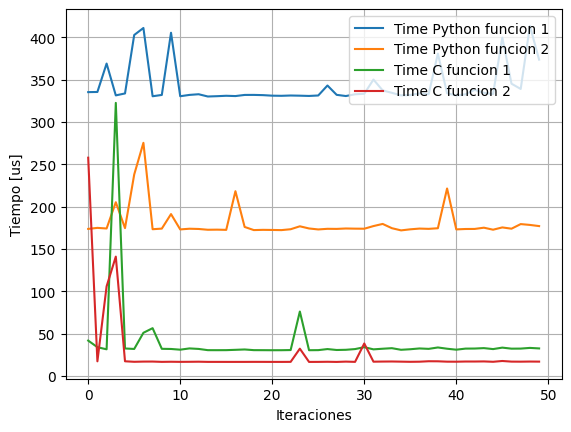

In [26]:
#modificacion: 16384,32768 

iteraciones = 50
time_funcion1_python = []
time_funcion2_python = []
time_funcion1_c = []
time_funcion2_c = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,1024)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))

    #Tiempo sin pow para Python funcion2: toc2-tic2
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,1024)
    toc2 = time.perf_counter()
    time_funcion2_python.append(1e6*(toc2-tic2))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,1024)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    #Tiempo sin pow para C funcion2: toc4-tic4
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,1024)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))


plt.plot(time_funcion1_python)
plt.plot(time_funcion2_python)
plt.plot(time_funcion1_c)
plt.plot(time_funcion2_c)
plt.grid()
plt.legend(["Time Python funcion 1","Time Python funcion 2", "Time C funcion 1","Time C funcion 2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Comparacion de funciones en python y C para N = 1024..png")
plt.show()





### GRÁFICA DE TIEMPO DE EJECUCIÓN DE LAS FUNCIONES USANDO UN N=2048:

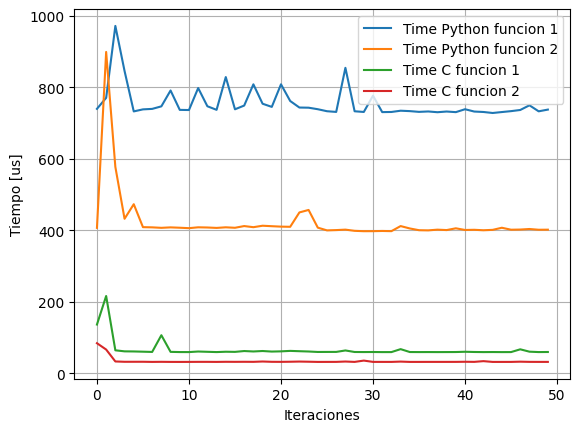

In [27]:
iteraciones = 50
time_funcion1_python = []
time_funcion2_python = []
time_funcion1_c = []
time_funcion2_c = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,2048)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))

    #Tiempo sin pow para Python funcion2: toc2-tic2
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,2048)
    toc2 = time.perf_counter()
    time_funcion2_python.append(1e6*(toc2-tic2))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,2048)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    #Tiempo sin pow para C funcion2: toc4-tic4
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,2048)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))


plt.plot(time_funcion1_python)
plt.plot(time_funcion2_python)
plt.plot(time_funcion1_c)
plt.plot(time_funcion2_c)
plt.grid()
plt.legend(["Time Python funcion 1","Time Python funcion 2", "Time C funcion 1","Time C funcion 2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Comparacion de funciones en python y C para N = 2048..png")
plt.show()

### GRÁFICA DE TIEMPO DE EJECUCIÓN DE LAS FUNCIONES USANDO UN N=4096:

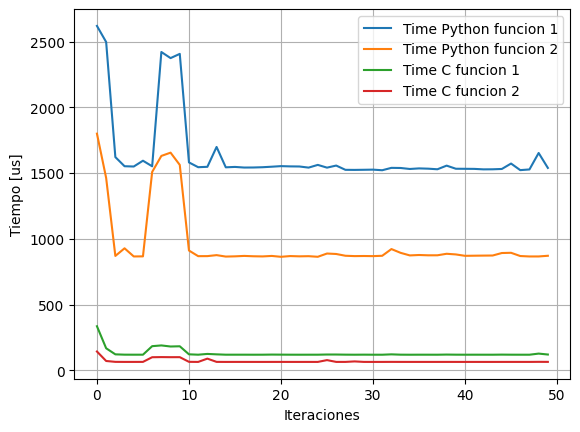

In [28]:
iteraciones = 50
time_funcion1_python = []
time_funcion2_python = []
time_funcion1_c = []
time_funcion2_c = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,4096)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))

    #Tiempo sin pow para Python funcion2: toc2-tic2
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,4096)
    toc2 = time.perf_counter()
    time_funcion2_python.append(1e6*(toc2-tic2))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,4096)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    #Tiempo sin pow para C funcion2: toc4-tic4
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,4096)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))


plt.plot(time_funcion1_python)
plt.plot(time_funcion2_python)
plt.plot(time_funcion1_c)
plt.plot(time_funcion2_c)
plt.grid()
plt.legend(["Time Python funcion 1","Time Python funcion 2", "Time C funcion 1","Time C funcion 2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Comparacion de funciones en python y C para N = 4096..png")
plt.show()

### GRÁFICA DE TIEMPO DE EJECUCIÓN DE LAS FUNCIONES USANDO UN N=8192:

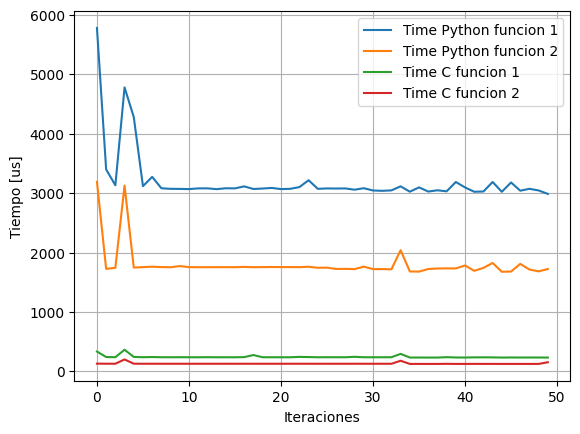

In [29]:
iteraciones = 50
time_funcion1_python = []
time_funcion2_python = []
time_funcion1_c = []
time_funcion2_c = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,8192)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))

    #Tiempo sin pow para Python funcion2: toc2-tic2
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,8192)
    toc2 = time.perf_counter()
    time_funcion2_python.append(1e6*(toc2-tic2))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,8192)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    #Tiempo sin pow para C funcion2: toc4-tic4
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,8192)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))


plt.plot(time_funcion1_python)
plt.plot(time_funcion2_python)
plt.plot(time_funcion1_c)
plt.plot(time_funcion2_c)
plt.grid()
plt.legend(["Time Python funcion 1","Time Python funcion 2", "Time C funcion 1","Time C funcion 2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Comparacion de funciones en python y C para N = 8192..png")
plt.show()

### GRÁFICA DE TIEMPO DE EJECUCIÓN DE LAS FUNCIONES USANDO UN N=16384:

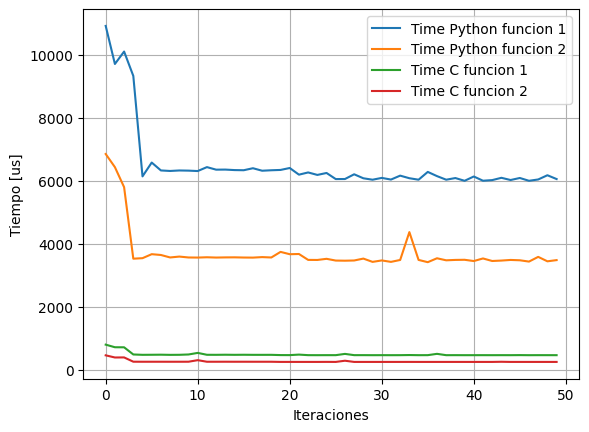

In [30]:
iteraciones = 50
time_funcion1_python = []
time_funcion2_python = []
time_funcion1_c = []
time_funcion2_c = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,16384)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))

    #Tiempo sin pow para Python funcion2: toc2-tic2
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,16384)
    toc2 = time.perf_counter()
    time_funcion2_python.append(1e6*(toc2-tic2))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,16384)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    #Tiempo sin pow para C funcion2: toc4-tic4
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,16384)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))


plt.plot(time_funcion1_python)
plt.plot(time_funcion2_python)
plt.plot(time_funcion1_c)
plt.plot(time_funcion2_c)
plt.grid()
plt.legend(["Time Python funcion 1","Time Python funcion 2", "Time C funcion 1","Time C funcion 2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Comparacion de funciones en python y C para N = 16384..png")
plt.show()

### GRÁFICA DE TIEMPO DE EJECUCIÓN DE LAS FUNCIONES USANDO UN N=32768:

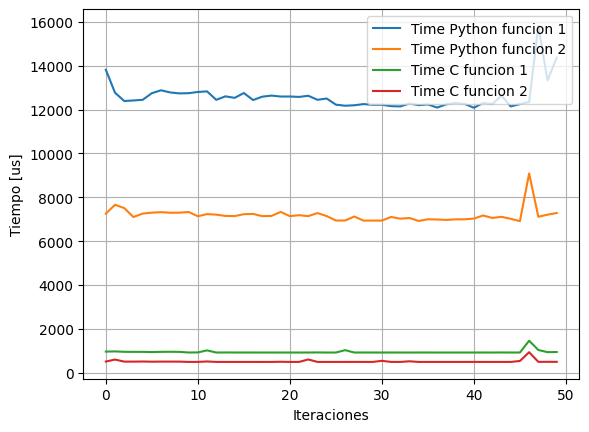

In [31]:
iteraciones = 50
time_funcion1_python = []
time_funcion2_python = []
time_funcion1_c = []
time_funcion2_c = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,32768)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))

    #Tiempo sin pow para Python funcion2: toc2-tic2
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,32768)
    toc2 = time.perf_counter()
    time_funcion2_python.append(1e6*(toc2-tic2))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,32768)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    #Tiempo sin pow para C funcion2: toc4-tic4
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,32768)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))


plt.plot(time_funcion1_python)
plt.plot(time_funcion2_python)
plt.plot(time_funcion1_c)
plt.plot(time_funcion2_c)
plt.grid()
plt.legend(["Time Python funcion 1","Time Python funcion 2", "Time C funcion 1","Time C funcion 2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Comparacion de funciones en python y C para N = 32768..png")
plt.show()

COMENTARIO:
Del resultado obtenido podemos notar que a medida que el N incrementa, los tiempos de ejecución también lo hacen. Sin embargo, pese a que los tiempos aumentan, las funciones que se realizaron en C tienen un tiempo considerablemente menor a diferencia de las que se realizaron y ejecutaron en python. POr ejemplo, observamos que el tiempo de las funciones en C para el valor de N más grande (N = 32768) no superan los 2000 micro segundos y los tiempos de las funciones de Python están por encima de los 6000 y 12000 us.Esto quiere decir que si necesitáramos una cantidad mucho mayor de N, no es conveniente realizar las funciones en python ya que los tiempos son demasiado altos. Es más eficiente las realizadas en C. Además, el utilizar la función pow genera un que el tiempo de ejecución incremente, por lo que es más conveniente no utilizarla. Otra observación es con respecto a los picos en los tiempos de ejecución. Los picos en todas las gráficas son más frecuentes y mucho mayores en las funciones de Python, en las funciones de C son más "constantes", es decir, hay picos pero en menor cantidad.   

i) (3.0 puntos) Calcular y graficar el SpeedUP para los mismos rangos de N del inciso anterior. Considerar que el SpeedUP debe ser entre las funciones análogas entre las funciones en C y Python. Realizar comentarios acerca de sus resultados

### SpeedUP para funciones1:

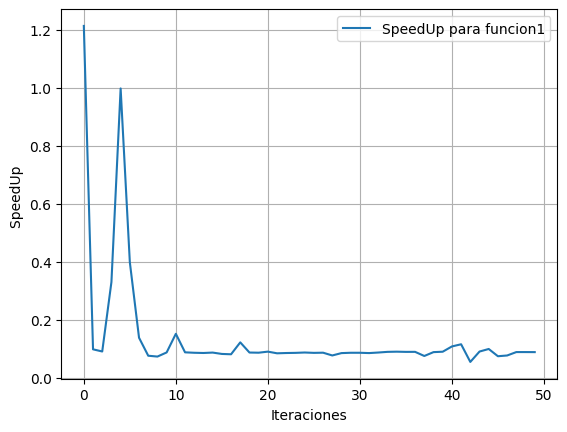

In [32]:
iteraciones = 50
time_funcion1_python = []
time_funcion1_c = []
SpeedUpFuncion1 = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,1024)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,1024)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    SpeedUpFuncion1.append((1e6*(toc3-tic3))/(1e6*(toc1-tic1)))
    
plt.plot(SpeedUpFuncion1)
plt.grid()
plt.legend(["SpeedUp para funcion1"])
plt.xlabel("Iteraciones")
plt.ylabel("SpeedUp ")
plt.savefig("SpeedUp de funciones 1 en python y C para N = 1024..png")
plt.show()

In [ ]:
iteraciones = 50
time_funcion1_python = []
time_funcion1_c = []
SpeedUpFuncion1 = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion1: toc1-tic1
    tic1 = time.perf_counter()
    CalcularSumatoria1(3.5,-0.25,1024)
    toc1 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))


    #Tiempo con pow para C funcion1: toc3-tic3
    tic3 = time.perf_counter()
    lib.CalcularSumatoria1(3.5,-0.25,1024)
    toc3 = time.perf_counter()
    time_funcion1_c.append(1e6*(toc3-tic3))
    
    SpeedUpFuncion1.append((1e6*(toc3-tic3))/(1e6*(toc1-tic1)))
    
plt.plot(SpeedUpFuncion1)
plt.grid()
plt.legend(["SpeedUp para funcion1"])
plt.xlabel("Iteraciones")
plt.ylabel("SpeedUp ")
plt.savefig("SpeedUp de funciones 1 en python y C para N = 1024..png")
plt.show()

### SpeedUP para funciones2:

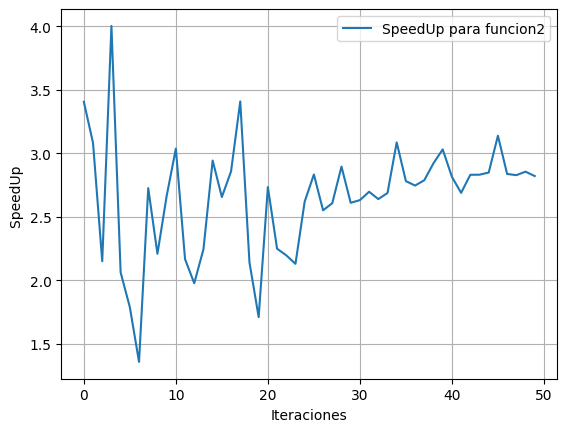

In [33]:
iteraciones = 50
time_funcion1_python = []
time_funcion1_c = []
SpeedUpFuncion2 = []


for _ in range(iteraciones):

    #Tiempo con pow para Python funcion2: toc1-tic1
    tic2 = time.perf_counter()
    CalcularSumatoria2(3.5,-0.25,1024)
    toc2 = time.perf_counter()
    time_funcion1_python.append(1e6*(toc1-tic1))


    #Tiempo con pow para C funcion2: toc3-tic3
    tic4 = time.perf_counter()
    lib2.CalcularSumatoria2(3.5,-0.25,32768)
    toc4 = time.perf_counter()
    time_funcion2_c.append(1e6*(toc4-tic4))
    
    SpeedUpFuncion2.append((1e6*(toc4-tic4))/(1e6*(toc2-tic2)))
    
plt.plot(SpeedUpFuncion2)
plt.grid()
plt.legend(["SpeedUp para funcion2"])
plt.xlabel("Iteraciones")
plt.ylabel("SpeedUp ")
plt.savefig("SpeedUp de funciones 2 en python y C para N = 1024..png")
plt.show()